**Anomaly Detection** is the identification of rare items, events or suspicious observations, since they are far from common operations over the data. Tipically, anomaly detection may regard bank frauds, a structural defect, medical issues or text errors. Apply here Deep Learning by exploiting some anomaly detection datasets. The first is, a credit card frauds dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud. Make and Exploratory Analysis and a Supervised Anomaly Detection with Deep Neural Netoworks. If needed, make use of other public datasets. Make all necessary plots and panels. 

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
#import csv
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [61]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [62]:
features = df.drop("Class",axis=1)
labels = df.loc[:,['Class']]

In [63]:
labels.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [70]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x_Train, labels, test_size=0.2, random_state=42)

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(features, labels,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [74]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
92115,63785.0,-1.071944,1.327893,1.243407,1.342019,-0.218011,-0.164481,0.381043,0.213661,-0.034576,...,-0.029952,0.013235,0.284476,-0.135359,0.410901,-0.205925,-0.307283,-0.254911,-0.097825,9.42
9996,15004.0,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,-0.205407,1.699304,...,-0.121607,-0.322912,-0.730294,0.205601,0.686302,-0.071008,0.729846,-0.092276,0.012277,12.18
154636,102338.0,-1.324034,-1.555857,-1.793627,1.699156,3.122708,-1.802140,0.646245,-0.227368,0.484345,...,0.891878,0.702612,1.542939,0.853379,0.644755,-1.013446,-0.454059,0.419895,0.453444,208.00
248890,154148.0,1.948204,-0.266158,-0.864932,0.419968,-0.312537,-0.158722,-0.717614,0.160188,0.902358,...,-0.131775,0.228516,0.780066,0.128449,0.720311,-0.244360,0.587613,-0.021168,-0.025759,11.57
80060,58315.0,0.863148,-1.043136,0.672817,-0.548246,-1.470418,-0.744978,-0.377664,-0.061065,1.900078,...,0.253432,0.252198,0.534182,-0.302602,0.415514,0.537504,-0.550131,0.054573,0.066467,200.00


In [75]:
X_train.shape

(170883, 30)

In [76]:
from tensorflow import keras
from keras import Sequential,layers,optimizers,metrics,losses
from keras.layers import Dense,Conv1D,LSTM,MaxPooling1D
import numpy as np
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

h =  model.fit(x=X_train, y=y_train, batch_size=64, epochs=5, validation_data=(X_val,y_val))

Epoch 1/5
2671/2671 [==============================] - 16s 6ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.0060 - val_accuracy: 0.9984
Epoch 2/5
2671/2671 [==============================] - 14s 5ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 3/5
2671/2671 [==============================] - 14s 5ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 4/5
2671/2671 [==============================] - 14s 5ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 5/5
2671/2671 [==============================] - 14s 5ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9992


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


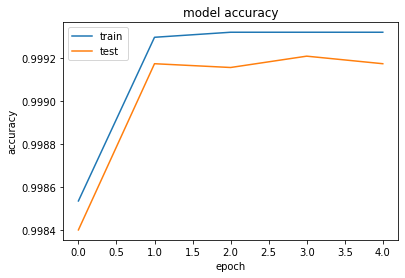

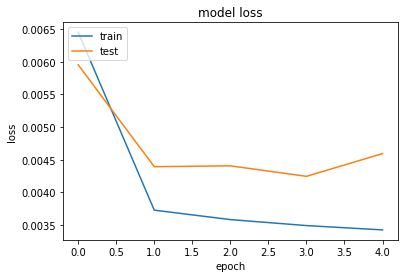

In [77]:
import matplotlib.pyplot as plt
print(h.history.keys())
# summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
preds = model.predict(X_test)

In [79]:
print(np.round(preds)[:5])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [80]:
print(len(np.round(preds)[np.round(preds)==1]))
print(len(np.round(preds)[np.round(preds)==0]))

100
56862


In [81]:
print(y_test[0:5])

        Class
135624      0
244064      0
67694       0
232400      0
227940      0


In [95]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, np.round(preds))
print(acc_score)

0.9994557775359011


In [89]:
output = X_test
output['fraud']=y_test
output['fraud_pred']=np.round(preds)
output['fraud_pred']=output['fraud_pred'].apply(lambda x:int(x))
output.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,fraud,fraud_pred
135624,81331.0,-1.236408,0.301105,2.028339,-1.429141,-0.475699,-0.475134,0.545331,-0.107686,0.847672,...,-0.100234,0.110286,0.480066,-0.370127,0.538318,-0.323706,0.180030,53.02,0,0
244064,152190.0,0.179364,1.078199,-1.190042,-0.233523,0.551875,-0.840685,0.502117,0.275007,-0.399442,...,0.977961,-0.147176,-0.561044,-0.230468,-0.140359,-0.074943,-0.061036,16.90,0,0
67694,52662.0,1.550514,-1.249872,-1.165750,-2.491016,0.968647,3.239918,-1.470500,0.743449,-1.986413,...,-0.531240,-0.012481,0.982425,0.543876,-0.192636,0.030188,0.016550,26.35,0,0
232400,147154.0,0.263962,-4.545747,-3.728843,-0.811586,-1.305241,-0.942947,1.349196,-0.769718,-2.312693,...,0.310271,-1.145192,-0.308338,0.214824,0.194619,-0.284280,0.086012,1106.75,0,0
227940,145292.0,1.915080,-1.139441,-1.135151,-0.749314,-1.050333,-1.376791,-0.326276,-0.308039,-0.726978,...,1.431018,-0.051918,0.603207,0.024375,0.010313,-0.063900,-0.049827,129.70,0,0


In [98]:
errors = output[output['fraud']!=output['fraud_pred']]
errors

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,fraud,fraud_pred
149577,91502.0,0.007379,2.365183,-2.600287,1.111602,3.276441,-1.776141,2.114531,-0.830084,0.900490,...,-0.902100,-0.404382,-0.012944,0.589836,-0.734449,-0.447529,-0.362375,1.00,1,0
91671,63578.0,-0.639191,-0.085595,1.265452,1.401166,-0.260542,1.009795,1.301999,-0.135258,-0.431521,...,0.760170,0.353377,-0.778893,-0.070681,-0.033355,-0.061962,-0.062687,290.18,1,0
219892,141925.0,0.120301,1.974141,-0.434087,5.390793,1.289684,0.280590,0.221963,0.067827,-1.387054,...,0.204554,-0.167313,0.791547,-0.223675,0.473223,-0.160202,0.065039,0.76,1,0
68067,52814.0,-1.101847,-1.632441,0.901067,0.847753,-1.249091,0.654937,1.448868,0.023308,-0.136742,...,0.835795,1.179955,-0.029091,-0.300896,0.699175,-0.336072,-0.177587,519.90,1,0
10484,17187.0,1.088375,0.898474,0.394684,3.170258,0.175739,-0.221981,-0.022989,-0.010874,0.860044,...,-0.800852,0.077614,0.167608,0.350182,-0.118941,0.012948,0.054254,3.79,1,0
114902,73667.0,-3.423854,1.579438,-1.338452,1.012327,-1.363651,-1.063367,-1.643178,0.783429,-0.356442,...,-0.683665,0.209910,-0.031626,-0.071505,0.048280,-0.225216,-0.189759,8.99,0,1
188416,127964.0,1.938716,2.525085,-4.655372,4.869108,2.582097,-2.290863,1.345659,-0.455895,-1.804046,...,-0.870088,-0.113318,-0.694864,0.352916,0.147329,0.010542,0.114174,0.77,0,1
93788,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,...,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.00,1,0
28976,35261.0,-1.236842,1.949390,-1.139733,1.142948,-1.189765,-1.097560,-2.130852,0.701933,-1.488241,...,-0.887139,-0.140437,-0.467764,0.041665,0.171172,0.865273,0.374717,2.69,0,1
149773,91898.0,-1.498067,2.451272,-1.783468,1.698102,0.040985,-1.799932,-1.549564,0.273845,-0.736819,...,0.312202,-0.672181,-0.300648,1.020633,0.213002,0.633793,0.383434,1.00,0,1


In [97]:
acc = 1 - len(errors)/len(output)
print('acc from pandas  ',acc)
print('acc from sklearn ',acc_score)

acc from pandas   0.9994557775359011
acc from sklearn  0.9994557775359011
